In [5]:
import subprocess
import os
import tarfile
import tempfile
import shutil
import concurrent.futures

from bs4 import BeautifulSoup
import PyPDF2
import requests





In [ ]:
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
def extract_title_and_abstract_from_arxiv(url):
    """
    Extracts the title and abstract from an arXiv webpage.
    
    Args:
        url (str): The URL of the arXiv paper (e.g., https://arxiv.org/abs/{id}).
    
    Returns:
        dict: A dictionary containing the title and abstract of the paper.
    """
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract and clean the title
        title_tag = soup.find('h1', class_='title')
        paper_title = title_tag.text.replace("Title:", "").strip() if title_tag else "Title not found"

        # Extract and clean the abstract
        abstract_tag = soup.find('blockquote', class_='abstract')
        paper_abstract = abstract_tag.text.replace("Abstract:", "").strip() if abstract_tag else "Abstract not found"

        return {'title': paper_title, 'abstract': paper_abstract}

    except Exception as e:
        print(f"Error processing URL: {url}")
        print(str(e))
        return {'title': 'Error', 'abstract': 'Error'}

def process_urls_file(input_file, output_file):
    """
    Processes a file of arXiv URLs and extracts titles and abstracts.
    
    Args:
        input_file (str): Path to the input file containing arXiv URLs (one per line).
        output_file (str): Path to the output file where titles and abstracts will be saved.
    """
    try:
        with open(input_file, 'r') as file:
            urls = [line.strip() for line in file.readlines() if line.strip()]
        
        results = []
        for url in tqdm(urls):
            print(f"Processing: {url}")
            result = extract_title_and_abstract_from_arxiv(url)
            results.append(result)
        
        # Save results to the output file
        with open(output_file, 'w') as out_file:
            for item in results:
                out_file.write(f"Title: {item['title']}\n")
                out_file.write(f"Abstract: {item['abstract']}\n")
                out_file.write("\n")
        print(f"Results saved to {output_file}")

    except Exception as e:
        print(f"Error processing file: {input_file}")
        print(str(e))

# Example usage
input_file = "sources/urls_arxiv.txt"
output_file = "titles_and_abstracts.txt"

process_urls_file(input_file, output_file)


In [7]:
import re

def count_abstract_paragraphs_and_words(file_path):
    """
    Count the number of paragraphs within each Abstract and the number of words per paragraph.

    Args:
        file_path (str): Path to the input .txt file.

    Returns:
        list: A list of dictionaries containing abstract paragraph counts and word counts.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Extract abstracts using the "Abstract:" marker
    abstracts = re.findall(r'Abstract:(.*?)(?=Title:|$)', content, re.DOTALL)

    abstract_statistics = []
    
    for idx, abstract in enumerate(abstracts, 1):
        # Split abstract into paragraphs (based on double newlines or single newlines)
        paragraphs = [p.strip() for p in abstract.split("\n") if p.strip()]
        
        # Count words for each paragraph
        word_counts = [len(paragraph.split()) for paragraph in paragraphs]
        
        # Store statistics for this abstract
        abstract_info = {
            'Abstract Number': idx,
            'Total Paragraphs': len(paragraphs),
            'Words Per Paragraph': word_counts
        }
        abstract_statistics.append(abstract_info)

    # Print statistics
    for stats in abstract_statistics:
        print(f"Abstract {stats['Abstract Number']}:")
        print(f"  Total Paragraphs: {stats['Total Paragraphs']}")
        for i, word_count in enumerate(stats['Words Per Paragraph'], 1):
            print(f"    Paragraph {i}: {word_count} words")
        print()

    return abstract_statistics

# Example usage
file_path = "titles_and_abstracts.txt"  # Replace with your .txt file path
abstract_stats = count_abstract_paragraphs_and_words(file_path)


Abstract 1:
  Total Paragraphs: 1
    Paragraph 1: 205 words

Abstract 2:
  Total Paragraphs: 1
    Paragraph 1: 130 words

Abstract 3:
  Total Paragraphs: 2
    Paragraph 1: 98 words
    Paragraph 2: 81 words

Abstract 4:
  Total Paragraphs: 1
    Paragraph 1: 151 words

Abstract 5:
  Total Paragraphs: 1
    Paragraph 1: 146 words

Abstract 6:
  Total Paragraphs: 1
    Paragraph 1: 142 words

Abstract 7:
  Total Paragraphs: 1
    Paragraph 1: 188 words

Abstract 8:
  Total Paragraphs: 2
    Paragraph 1: 171 words
    Paragraph 2: 85 words

Abstract 9:
  Total Paragraphs: 1
    Paragraph 1: 82 words

Abstract 10:
  Total Paragraphs: 1
    Paragraph 1: 191 words

Abstract 11:
  Total Paragraphs: 1
    Paragraph 1: 157 words

Abstract 12:
  Total Paragraphs: 1
    Paragraph 1: 159 words

Abstract 13:
  Total Paragraphs: 1
    Paragraph 1: 141 words

Abstract 14:
  Total Paragraphs: 1
    Paragraph 1: 79 words

Abstract 15:
  Total Paragraphs: 1
    Paragraph 1: 212 words

Abstract 16:
  

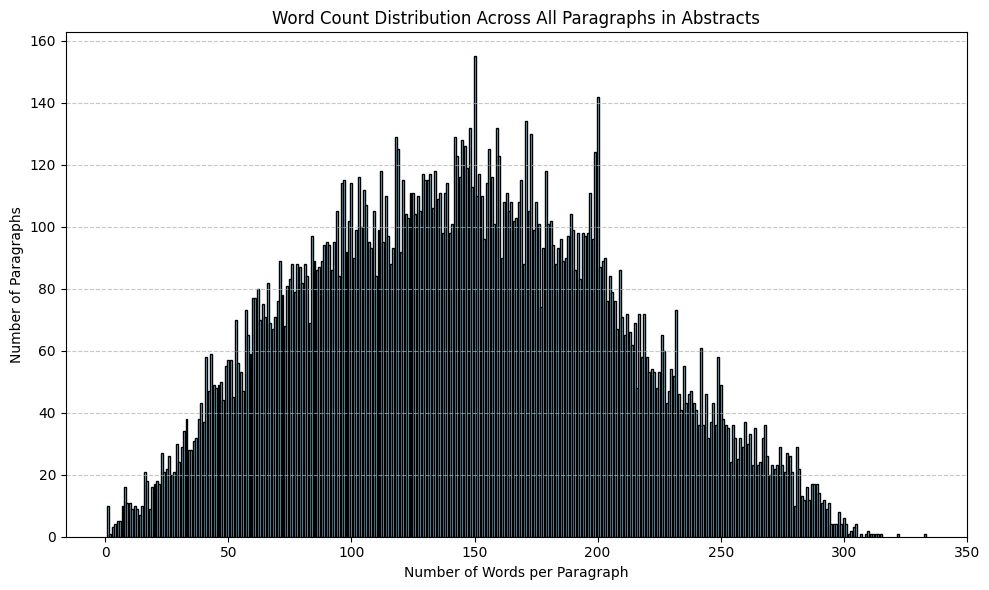

In [12]:
import re
import matplotlib.pyplot as plt
from collections import Counter

def count_abstract_paragraphs_and_words(file_path):
    """
    Count the number of paragraphs within each Abstract and the number of words per paragraph.

    Args:
        file_path (str): Path to the input .txt file.

    Returns:
        list: A flat list of word counts for all paragraphs.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Extract abstracts using the "Abstract:" marker
    abstracts = re.findall(r'Abstract:(.*?)(?=Title:|$)', content, re.DOTALL)

    all_word_counts = []
    for abstract in abstracts:
        # Split abstract into paragraphs (based on line breaks)
        paragraphs = [p.strip() for p in abstract.split("\n") if p.strip()]
        
        # Count words for each paragraph and add to list
        word_counts = [len(paragraph.split()) for paragraph in paragraphs]
        all_word_counts.extend(word_counts)

    return all_word_counts

def plot_word_count_distribution(word_counts):
    """
    Plots a single histogram showing the distribution of word counts across all paragraphs.

    Args:
        word_counts (list): A list of word counts for paragraphs.
    """
    # Count occurrences of word lengths
    word_count_distribution = Counter(word_counts)

    # Sort the counts by word length
    sorted_word_counts = sorted(word_count_distribution.items())

    # Prepare data for plotting
    x = [item[0] for item in sorted_word_counts]  # Word lengths
    y = [item[1] for item in sorted_word_counts]  # Number of paragraphs

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue', edgecolor='black')
    plt.title("Word Count Distribution Across All Paragraphs in Abstracts")
    plt.xlabel("Number of Words per Paragraph")
    plt.ylabel("Number of Paragraphs")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
file_path = "titles_and_abstracts.txt"  # Replace with your .txt file path

# Step 1: Get word counts for all paragraphs
word_counts = count_abstract_paragraphs_and_words(file_path)

# Step 2: Plot the word count distribution
plot_word_count_distribution(word_counts)


In [13]:
import re

def count_total_paragraphs(file_path):
    """
    Counts the total number of paragraphs across all Abstracts in a .txt file.

    Args:
        file_path (str): Path to the input .txt file.

    Returns:
        int: Total number of paragraphs.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Extract abstracts using the "Abstract:" marker
    abstracts = re.findall(r'Abstract:(.*?)(?=Title:|$)', content, re.DOTALL)

    total_paragraphs = 0

    for abstract in abstracts:
        # Split abstract into paragraphs based on line breaks
        paragraphs = [p.strip() for p in abstract.split("\n") if p.strip()]
        total_paragraphs += len(paragraphs)

    print(f"Total Number of Paragraphs: {total_paragraphs}")
    return total_paragraphs

# Example usage
  # Replace with your .txt file path
count_total_paragraphs(file_path)


Total Number of Paragraphs: 20031


20031